# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is...


In [1]:
import sys
path = "/Users/usuario/git/sisepuede"
if path not in sys.path:
    sys.path.append(path)
    
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import sisepuede as ssp
import sisepuede.manager.sisepuede_examples as sxl
import sisepuede.plotting.plots as spp
import sisepuede.transformers as trf
import sisepuede.utilities._plotting as sup
from typing import *
import warnings
warnings.filterwarnings("ignore")

log = None
_REGION_NAME = "peru"

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments
- Once transformations are defined, it's easy to 

In [15]:

path_strategies = "/Users/usuario/Desktop/transformations_default"
examples = sxl.SISEPUEDEExamples()
df_examples = examples("input_data_frame")

# set up transformers/transformations
#  NOTE: This is an issues that's being worked out:
#        To instantiate a strategies object, need to build transformers
#        and transformations object with a dataframe. Use df_examples;
#        since we're not building tables, it won't be used, but it just
#        allows the object to instantiate.
transformers = trf.Transformers({}, df_input = df_examples,)

transformations = trf.Transformations(
    path_strategies,
    transformers = transformers,
)

strategies = trf.Strategies(
    transformations,
    export_path = "transformations",
)


# built SISEPUEDE object
sisepuede = ssp.SISEPUEDE(
    "calibrated",
    logger = log,
    strategies = strategies,
    regions = [_REGION_NAME],
)

log = sisepuede.logger


2025-08-01 13:18:45,444 - INFO - Successfully initialized SISEPUEDEFileStructure.
2025-08-01 13:18:45,444 - INFO - Successfully initialized SISEPUEDEFileStructure.
2025-08-01 13:18:45,448 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2025-08-01 13:18:45,448 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2025-08-01 13:18:45,449 - INFO - 	Setting export engine to 'sqlite'.
2025-08-01 13:18:45,449 - INFO - 	Setting export engine to 'sqlite'.
2025-08-01 13:18:45,450 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2025-08-01 13:18:45,450 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2025-08-01 13:18:45,450 - INFO - Successfully instantiated table ANALYSIS_METADATA
2025-08-01 13:18:45,450 - INFO - Succes

yay


2025-08-01 13:18:46,048 - INFO - Initializing FutureTrajectories
2025-08-01 13:18:46,048 - INFO - Initializing FutureTrajectories
2025-08-01 13:18:48,144 - INFO - Instantiating 1738 sampling units.
2025-08-01 13:18:48,144 - INFO - Instantiating 1738 sampling units.
2025-08-01 13:18:48,154 - INFO - Iteration 0 complete.
2025-08-01 13:18:48,154 - INFO - Iteration 0 complete.
2025-08-01 13:18:50,752 - INFO - Iteration 250 complete.
2025-08-01 13:18:50,752 - INFO - Iteration 250 complete.
2025-08-01 13:18:52,290 - INFO - Iteration 500 complete.
2025-08-01 13:18:52,290 - INFO - Iteration 500 complete.
2025-08-01 13:18:53,837 - INFO - Iteration 750 complete.
2025-08-01 13:18:53,837 - INFO - Iteration 750 complete.
2025-08-01 13:18:55,607 - INFO - Iteration 1000 complete.
2025-08-01 13:18:55,607 - INFO - Iteration 1000 complete.
2025-08-01 13:18:57,112 - INFO - Iteration 1250 complete.
2025-08-01 13:18:57,112 - INFO - Iteration 1250 complete.
2025-08-01 13:18:58,655 - INFO - Iteration 1500 co

###  Call the .project_scenarios() method (or simply call the SISEPUEDE object) to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [21]:
sisepuede.model_attributes.get_dimensional_attribute_table(
    sisepuede.key_strategy,
)

,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
0,0,BASE,Strategy TX:BASE,NaN,TX:BASE,1
1,1000,AGRC:DEC_CH4_RICE,Singleton - Default Value - AGRC: Improve rice...,NaN,TX:AGRC:DEC_CH4_RICE,0
2,1001,AGRC:DEC_EXPORTS,Singleton - Default Value - AGRC: Decrease Exp...,NaN,TX:AGRC:DEC_EXPORTS,0
3,1002,AGRC:DEC_LOSSES_SUPPLY_CHAIN,Singleton - Default Value - AGRC: Reduce suppl...,NaN,TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN,0
4,1003,AGRC:INC_CONSERVATION_AGRICULTURE,Singleton - Default Value - AGRC: Expand conse...,NaN,TX:AGRC:INC_CONSERVATION_AGRICULTURE,0
...,...,...,...,...,...,...
66,4005,IPPU:DEC_PFCS,Singleton - Default Value - IPPU: Reduce use o...,NaN,TX:IPPU:DEC_PFCS,0
67,4006,IP:ALL,Sectoral Composite - IPPU,All (unique by transformer) IPPU transformations,TX:IPPU:DEC_CLINKER|TX:IPPU:DEC_DEMAND|TX:IPPU...,0
68,6000,PFLO:INC_HEALTHIER_DIETS,Singleton - Default Value - PFLO: Change diets,NaN,TX:PFLO:INC_HEALTHIER_DIETS,0
69,6001,PFLO:INC_IND_CCS,Singleton - Default Value - PFLO: Industrial c...,NaN,TX:PFLO:INC_IND_CCS,0


In [22]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
dict_filt = {
    "future_id": [0],
    "design_id": [0],
    "strategy_id": [1014, 5009, 6002, 6001] # note that 5009 does not exist in the attribute table. 
}

primary_keys_out = sisepuede(
    dict_filt,
    chunk_size = 2 # how often do we write to the output database
)

2025-08-01 13:20:12,686 - INFO - 
***	STARTING REGION peru	***

2025-08-01 13:20:12,686 - INFO - 
***	STARTING REGION peru	***

2025-08-01 13:20:13,897 - INFO - Trying run primary_id = 15015 in region peru
2025-08-01 13:20:13,897 - INFO - Trying run primary_id = 15015 in region peru
2025-08-01 13:20:13,898 - INFO - Running AFOLU model
2025-08-01 13:20:13,898 - INFO - Running AFOLU model
2025-08-01 13:20:14,122 - INFO - AFOLU model run successfully completed
2025-08-01 13:20:14,122 - INFO - AFOLU model run successfully completed
2025-08-01 13:20:14,123 - INFO - Running CircularEconomy model
2025-08-01 13:20:14,123 - INFO - Running CircularEconomy model
2025-08-01 13:20:14,147 - INFO - CircularEconomy model run successfully completed
2025-08-01 13:20:14,147 - INFO - CircularEconomy model run successfully completed
2025-08-01 13:20:14,148 - INFO - Running IPPU model
2025-08-01 13:20:14,148 - INFO - Running IPPU model
2025-08-01 13:20:14,188 - INFO - IPPU model run successfully completed
2

2025-01-Aug 13:20:14.594 Opened SQLite database at /Users/usuario/git/sisepuede/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2025-01-Aug 13:20:14.723 Added NEMO structure to SQLite database at /Users/usuario/git/sisepuede/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2025-01-Aug 13:20:22.348 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2025-08-01 13:20:52,480 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-08-01 13:20:52,480 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-08-01 13:20:52,489 - INFO - EnergyProduction model run successfully completed
2025-08-01 13:20:52,489 - INFO - EnergyProduction model run successfully completed
2025-08-01 13:20:52,489 - INFO - Running Energy (Fugitive Emissions)
2025-08-01 13:20:52,489 - INFO - Running Energy (Fugitive Emissions)
2025-08-01 13:20:52,513 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-08-01 13:20:52,513 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-08-01 13:20:52,514 - INFO - Appending Socioeconomic outputs
2025-08-01 13:20:52,514 - INFO - Appending Socioec

2025-01-Aug 13:20:52.365 Finished modeling scenario.


2025-08-01 13:20:52,768 - INFO - AFOLU model run successfully completed
2025-08-01 13:20:52,768 - INFO - AFOLU model run successfully completed
2025-08-01 13:20:52,768 - INFO - Running CircularEconomy model
2025-08-01 13:20:52,768 - INFO - Running CircularEconomy model
2025-08-01 13:20:52,792 - INFO - CircularEconomy model run successfully completed
2025-08-01 13:20:52,792 - INFO - CircularEconomy model run successfully completed
2025-08-01 13:20:52,793 - INFO - Running IPPU model
2025-08-01 13:20:52,793 - INFO - Running IPPU model
2025-08-01 13:20:52,833 - INFO - IPPU model run successfully completed
2025-08-01 13:20:52,833 - INFO - IPPU model run successfully completed
2025-08-01 13:20:52,833 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2025-08-01 13:20:52,833 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2025-08-01 13:20:52,844 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_eff

2025-01-Aug 13:20:53.518 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.
2025-01-Aug 13:21:16.510 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2025-08-01 13:21:16,601 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-08-01 13:21:16,601 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-08-01 13:21:16,608 - INFO - EnergyProduction model run successfully completed
2025-08-01 13:21:16,608 - INFO - EnergyProduction model run successfully completed
2025-08-01 13:21:16,609 - INFO - Running Energy (Fugitive Emissions)
2025-08-01 13:21:16,609 - INFO - Running Energy (Fugitive Emissions)
2025-08-01 13:21:16,632 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-08-01 13:21:16,632 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-08-01 13:21:16,632 - INFO - Appending Socioeconomic outputs
2025-08-01 13:21:16,632 - INFO - Appending Socioec

2025-01-Aug 13:21:17.965 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2025-08-01 13:21:43,952 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-08-01 13:21:43,952 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-08-01 13:21:43,959 - INFO - EnergyProduction model run successfully completed
2025-08-01 13:21:43,959 - INFO - EnergyProduction model run successfully completed
2025-08-01 13:21:43,960 - INFO - Running Energy (Fugitive Emissions)
2025-08-01 13:21:43,960 - INFO - Running Energy (Fugitive Emissions)
2025-08-01 13:21:43,982 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-08-01 13:21:43,982 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-08-01 13:21:43,983 - INFO - Appending Socioeconomic outputs
2025-08-01 13:21:43,983 - INFO - Appending Socioec

2025-01-Aug 13:21:43.863 Finished modeling scenario.


2025-08-01 13:21:44,140 - INFO - Table MODEL_OUTPUT successfully appended to database.
2025-08-01 13:21:44,140 - INFO - Table MODEL_OUTPUT successfully appended to database.
2025-08-01 13:21:44,145 - INFO - Table ATTRIBUTE_PRIMARY successfully written to database.
2025-08-01 13:21:44,145 - INFO - Table ATTRIBUTE_PRIMARY successfully written to database.


# After running the model, we can see the primary ids that completed successfully

In [36]:
for k, v in primary_keys_out.items():
    print(v)

[15015, 69069, 70070]


##  Before we read in the data, a little on primary ids
- Primary ids are stored in a virtual table (indexing mechanism, the `sisepuede.odpt_primary` object)
- You can find the primary id using `sisepuede.odpt_primary.get_key_value`

In [49]:
sisepuede.odpt_primary.get_key_value(
    **{
        "design_id": 0,
        "future_id": 0,
        "strategy_id": 1014
    }
)



15015

##  You can quickly see what the dimensions associated with each primary key are by calling:

###  `sisepuede.odpt_primary.get_indexing_dataframe_from_primary_key`


In [53]:
sisepuede.odpt_primary.get_indexing_dataframe_from_primary_key(
    list(primary_keys_out.get(_REGION_NAME))
)

,primary_id,design_id,strategy_id,future_id
0,15015,0,1014,0
1,69069,0,6001,0
2,70070,0,6002,0


###  Retrieve outputs using SISEPUEDE.read_output()

In [50]:
df_out = sisepuede.read_output(None)
df_out

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,15015,peru,0,369318.579985,688160.487871,39882.929854,316572.871666,1366.720811,3728.490914,130301.410464,...,3.731296e+06,5555.993440,11355.243362,378727.564583,503633.028662,342059.520501,2.319395e+06,7.515753e+06,4.153821e+06,1.761864e+06
1,15015,peru,1,375945.705353,699043.631490,40897.960041,315392.882011,1367.612978,3803.831286,127737.746149,...,3.841721e+06,5629.505490,11375.548042,395939.125240,486338.945996,339120.056772,2.294281e+06,7.316952e+06,4.180471e+06,1.765747e+06
2,15015,peru,2,399672.576875,704387.021263,40551.673946,330783.872932,1388.588126,3906.728073,123084.772217,...,3.815294e+06,5740.215029,11764.330264,422313.085637,511624.527812,359924.205375,2.345797e+06,7.944318e+06,4.362483e+06,1.838579e+06
3,15015,peru,3,452799.979433,700666.575896,39440.418124,328203.549775,1385.927255,3950.775600,122895.583417,...,4.003062e+06,5728.591942,11820.128456,402522.993227,511960.730907,365567.345827,2.527680e+06,7.924563e+06,4.405842e+06,1.894787e+06
4,15015,peru,4,480494.319528,708939.730845,39649.136940,333324.076629,1393.562031,3891.037107,123995.684662,...,4.032644e+06,5807.600363,12475.962587,410537.332698,502689.452129,363449.882609,2.458838e+06,8.143492e+06,4.538531e+06,1.922493e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,70070,peru,31,505945.148955,613169.425465,37507.547197,353825.817034,1359.262209,4062.741690,127127.666851,...,4.987922e+06,6600.557215,15178.709182,490448.149060,598373.913656,442963.353138,2.817516e+06,8.111291e+06,5.552745e+06,2.355225e+06
104,70070,peru,32,505403.910603,607900.817854,37347.791140,353580.774492,1353.467839,4059.920719,126836.695102,...,5.021665e+06,6621.467747,15281.365112,492977.287256,600271.848601,445247.620269,2.822982e+06,8.097919e+06,5.590310e+06,2.371158e+06
105,70070,peru,33,504864.894955,602784.083009,37187.206274,353291.705727,1347.643516,4056.594359,126527.756107,...,5.054727e+06,6641.810696,15381.947388,495419.320338,602118.322437,447453.215474,2.827761e+06,8.083255e+06,5.627115e+06,2.386769e+06
106,70070,peru,34,504349.579519,597810.946984,37027.895425,352991.781041,1341.865444,4053.143473,126213.671067,...,5.087571e+06,6661.961135,15481.868523,497823.266953,603947.338010,449624.411560,2.832175e+06,8.067935e+06,5.663679e+06,2.402278e+06


####  Note that SISEPUEDE.read_output() can be used to execute additional filtering queries by using dict_subset = {}
- e.g., if we only care about the final time period, we can set
    ``dict_subset = {"time_period": 35}``

In [54]:
sisepuede.read_output(
    None, 
    dict_subset = {
        sisepuede.key_time_period: [35],
        sisepuede.key_region: [_REGION_NAME]
    }
)

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,15015,peru,35,623791.054122,796242.995428,46419.829576,423417.049764,1548.708859,4647.121032,152499.107213,...,5.122612e+06,6454.166734,14900.219070,504909.294071,638377.360401,455865.774649,2.926815e+06,8.758686e+06,5.702571e+06,2.418559e+06
1,69069,peru,35,623791.054122,796242.995428,46419.829576,423417.049764,1548.708859,4647.121032,152499.107213,...,5.122612e+06,6454.166734,14900.219070,504909.294071,638377.360401,455865.774649,2.926815e+06,8.758686e+06,5.702571e+06,2.418559e+06
2,70070,peru,35,503866.895303,592955.342435,36870.895997,352698.373318,1336.171220,4049.767539,125901.342526,...,5.120447e+06,6682.112111,15581.885614,500216.106962,605776.394842,451785.576287,2.836408e+06,8.052329e+06,5.700277e+06,2.417801e+06


###  1. We can examine aggregate emissions across scenarios

In [55]:
# could query this, but our dataset is small enough to store in memory
df_out_region = (
    df_out[
        df_out[sisepuede.key_region].isin([_REGION_NAME])
    ]
    .reset_index(drop = True)
)

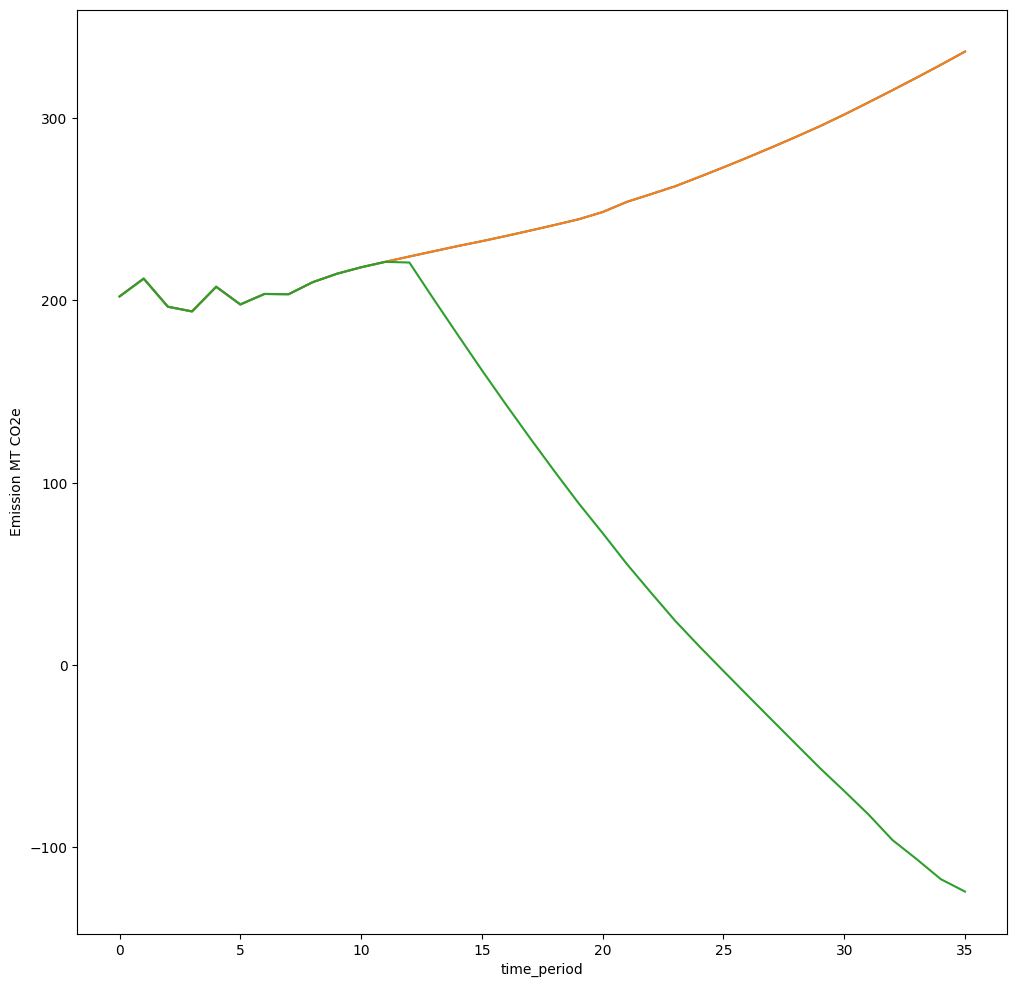

In [56]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_xlabel(sisepuede.key_time_period)
ax.set_ylabel("Emission MT CO2e")
# 
all_primaries = sorted(list(df_out_region[sisepuede.key_primary].unique()))
dfg = df_out_region.groupby([sisepuede.key_primary])

for i, df_cur in dfg:
  
    
    y = np.array(df_cur[
        [x for x in df_out.columns if x.startswith("emission_co2e_subsector_")]
    ].sum(axis = 1)) 
    x = np.array(df_cur[sisepuede.key_time_period])
    
    ax.plot(x, y)
    
plt.show()


##  Oops! Missing baseline
- Baseline strategy is always 0
- We can re-run sisepuede, and if we include and runs that have already been run, the db management system will avoid re-running those

In [67]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
dict_filt = {
    "future_id": [0],
    "design_id": [0],
    "strategy_id": [0, 1014, 6002, 6001] 
}

primary_keys_out_2 = sisepuede(
    dict_filt,
    chunk_size = 2 # how often do we write to the output database
)

2025-08-01 13:43:21,381 - INFO - 
***	STARTING REGION peru	***

2025-08-01 13:43:21,381 - INFO - 
***	STARTING REGION peru	***

2025-08-01 13:43:22,590 - INFO - Trying run primary_id = 0 in region peru
2025-08-01 13:43:22,590 - INFO - Trying run primary_id = 0 in region peru
2025-08-01 13:43:22,591 - INFO - Running AFOLU model
2025-08-01 13:43:22,591 - INFO - Running AFOLU model
2025-08-01 13:43:22,814 - INFO - AFOLU model run successfully completed
2025-08-01 13:43:22,814 - INFO - AFOLU model run successfully completed
2025-08-01 13:43:22,815 - INFO - Running CircularEconomy model
2025-08-01 13:43:22,815 - INFO - Running CircularEconomy model
2025-08-01 13:43:22,840 - INFO - CircularEconomy model run successfully completed
2025-08-01 13:43:22,840 - INFO - CircularEconomy model run successfully completed
2025-08-01 13:43:22,840 - INFO - Running IPPU model
2025-08-01 13:43:22,840 - INFO - Running IPPU model
2025-08-01 13:43:22,880 - INFO - IPPU model run successfully completed
2025-08-0

2025-01-Aug 13:43:23.544 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2025-08-01 13:43:47,941 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-08-01 13:43:47,941 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2025-08-01 13:43:47,951 - INFO - EnergyProduction model run successfully completed
2025-08-01 13:43:47,951 - INFO - EnergyProduction model run successfully completed
2025-08-01 13:43:47,951 - INFO - Running Energy (Fugitive Emissions)
2025-08-01 13:43:47,951 - INFO - Running Energy (Fugitive Emissions)
2025-08-01 13:43:47,973 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-08-01 13:43:47,973 - INFO - Fugitive Emissions from Energy model run successfully completed
2025-08-01 13:43:47,974 - INFO - Appending Socioeconomic outputs
2025-08-01 13:43:47,974 - INFO - Appending Socioec

2025-01-Aug 13:43:47.852 Finished modeling scenario.


2025-08-01 13:43:48,141 - INFO - Table MODEL_OUTPUT successfully appended to database.
2025-08-01 13:43:48,141 - INFO - Table MODEL_OUTPUT successfully appended to database.
2025-08-01 13:43:48,144 - INFO - Table ATTRIBUTE_PRIMARY successfully appended to database.
2025-08-01 13:43:48,144 - INFO - Table ATTRIBUTE_PRIMARY successfully appended to database.


##  Have to read the output again

In [72]:
df_out = sisepuede.read_output(None)

# could query this, but our dataset is small enough to store in memory
df_out_region = (
    df_out[
        df_out[sisepuede.key_region].isin([_REGION_NAME])
    ]
    .reset_index(drop = True)
)

df_out_region

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,15015,peru,0,369318.579985,688160.487871,39882.929854,316572.871666,1366.720811,3728.490914,130301.410464,...,3.731296e+06,5555.993440,11355.243362,378727.564583,503633.028662,342059.520501,2.319395e+06,7.515753e+06,4.153821e+06,1.761864e+06
1,15015,peru,1,375945.705353,699043.631490,40897.960041,315392.882011,1367.612978,3803.831286,127737.746149,...,3.841721e+06,5629.505490,11375.548042,395939.125240,486338.945996,339120.056772,2.294281e+06,7.316952e+06,4.180471e+06,1.765747e+06
2,15015,peru,2,399672.576875,704387.021263,40551.673946,330783.872932,1388.588126,3906.728073,123084.772217,...,3.815294e+06,5740.215029,11764.330264,422313.085637,511624.527812,359924.205375,2.345797e+06,7.944318e+06,4.362483e+06,1.838579e+06
3,15015,peru,3,452799.979433,700666.575896,39440.418124,328203.549775,1385.927255,3950.775600,122895.583417,...,4.003062e+06,5728.591942,11820.128456,402522.993227,511960.730907,365567.345827,2.527680e+06,7.924563e+06,4.405842e+06,1.894787e+06
4,15015,peru,4,480494.319528,708939.730845,39649.136940,333324.076629,1393.562031,3891.037107,123995.684662,...,4.032644e+06,5807.600363,12475.962587,410537.332698,502689.452129,363449.882609,2.458838e+06,8.143492e+06,4.538531e+06,1.922493e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0,peru,31,614893.820915,788035.270483,45876.036864,417477.636511,1533.456186,4586.557411,150552.539139,...,5.050756e+06,6390.601998,14706.031956,498464.403469,630837.780425,450050.083741,2.896571e+06,8.687332e+06,5.622582e+06,2.384639e+06
140,0,peru,32,617907.721433,790387.651631,46045.677563,419500.906311,1537.752230,4606.561502,151192.268150,...,5.075234e+06,6408.505541,14770.171732,500582.481989,633199.605404,451960.899745,2.905558e+06,8.704871e+06,5.649830e+06,2.396193e+06
141,0,peru,33,620462.250995,792574.961504,46195.012698,421192.350872,1541.748420,4623.555217,151735.110257,...,5.095697e+06,6425.159461,14824.659235,502379.777577,635274.183755,453582.538905,2.913525e+06,8.722289e+06,5.672609e+06,2.405853e+06
142,0,peru,34,622464.863354,794550.168794,46321.140201,422516.857658,1545.416277,4637.241171,152174.891425,...,5.111722e+06,6440.445063,14868.540954,503835.848599,637020.159609,454896.596509,2.920592e+06,8.740065e+06,5.690447e+06,2.413417e+06


###  2. We can also see CO2e by subsector

###  Look at primary ids

In [74]:
primary_keys = primary_keys_out.get(_REGION_NAME)
sisepuede.odpt_primary.get_indexing_dataframe_from_primary_key(
    sorted(df_out[sisepuede.key_primary].unique())
)


,primary_id,design_id,strategy_id,future_id
0,0,0,0,0
1,15015,0,1014,0
2,69069,0,6001,0
3,70070,0,6002,0


In [40]:
?sisepuede.odpt_primary.get_key_value

Signature: sisepuede.odpt_primary.get_key_value(**kwargs) -> int
Docstring: Get the key value associated with an input set of dimensional values.
File:      ~/Documents/Projects/git_jbus/sisepuede/python/ordered_direct_product_table.py
Type:      method


###  Examine baseline strategy

(<Figure size 1200x700 with 1 Axes>,
 <Axes: xlabel='time_period', ylabel='Emission MT CO2e'>)

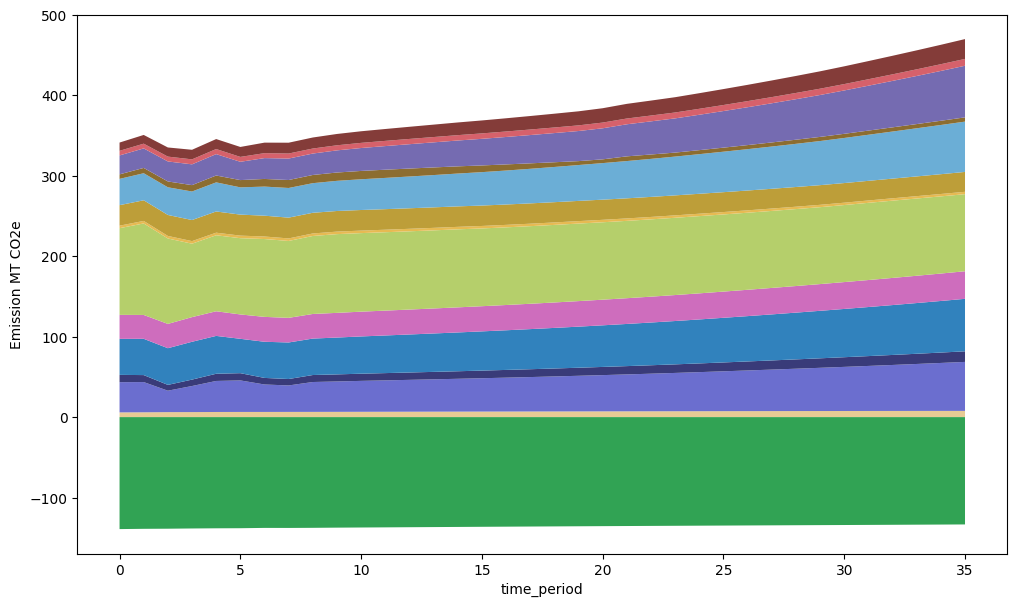

In [75]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.set_xlabel(sisepuede.key_time_period)
ax.set_ylabel("Emission MT CO2e")

# get scenario key from dictionary
primary_id = sisepuede.odpt_primary.get_key_value(
    **{
        sisepuede.key_design: 0,
        sisepuede.key_future: 0,
        sisepuede.key_strategy: 0,
    }
)
df_cur = df_out_region[df_out_region[sisepuede.key_primary].isin([primary_id])]

spp.plot_emissions_stack(
    df_cur,
    sisepuede.model_attributes,
    figtuple = (fig, ax), 
)



## How about strategy 6002?

In [82]:
strategies.get_strategy(6002).name


'All Actions'

(<Figure size 1200x700 with 1 Axes>,
 <Axes: xlabel='time_period', ylabel='Emission MT CO2e'>)

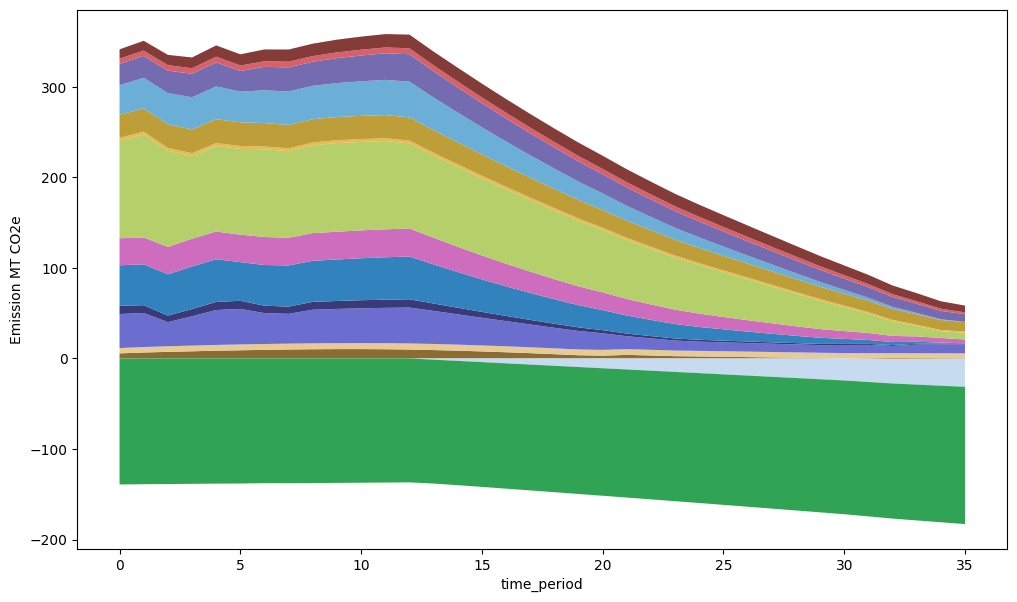

In [76]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.set_xlabel(sisepuede.key_time_period)
ax.set_ylabel("Emission MT CO2e")

# get scenario key from dictionary
primary_id = sisepuede.odpt_primary.get_key_value(
    **{
        sisepuede.key_design: 0,
        sisepuede.key_future: 0,
        sisepuede.key_strategy: 6002,
    }
)
df_cur = df_out_region[df_out_region[sisepuede.key_primary].isin([primary_id])]

spp.plot_emissions_stack(
    df_cur,
    sisepuede.model_attributes,
    figtuple = (fig, ax), 
)



###  3a. We can go further down and look at gas within subsector - CH4 emisions from Livestock Enteric Fermentation

In [92]:
# look for baseline
primary_id = sisepuede.odpt_primary.get_key_value(
    **{
        sisepuede.key_design: 0,
        sisepuede.key_future: 0,
        sisepuede.key_strategy: 0
    }
)

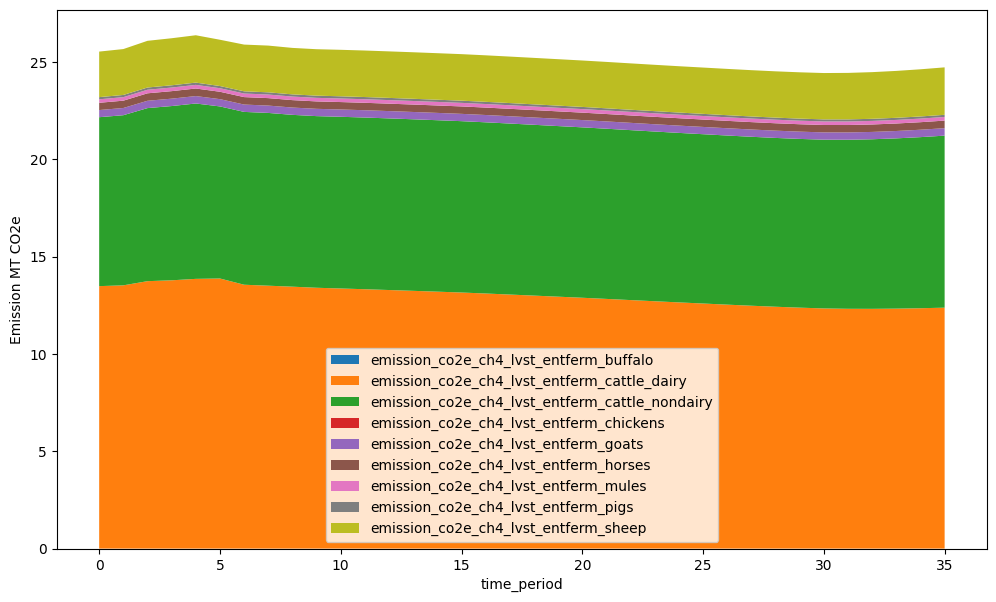

In [96]:
# variable to examine
modvar = sisepuede.model_attributes.get_variable(
    ":math:\\text{CH}_4 Emissions from Livestock Enteric Fermentation",
)


fig, ax = plt.subplots(figsize = (12, 7))
ax.set_xlabel(sisepuede.key_time_period)
ax.set_ylabel("Emission MT CO2e")


df_cur = df_out_region[df_out_region[sisepuede.key_primary].isin([primary_id])]

sup.plot_stack(
    df_cur,
    modvar.fields,
    figtuple = (fig, ax, ),
)

ax.legend()

###  3b. HFCs and PFCs in IPPU

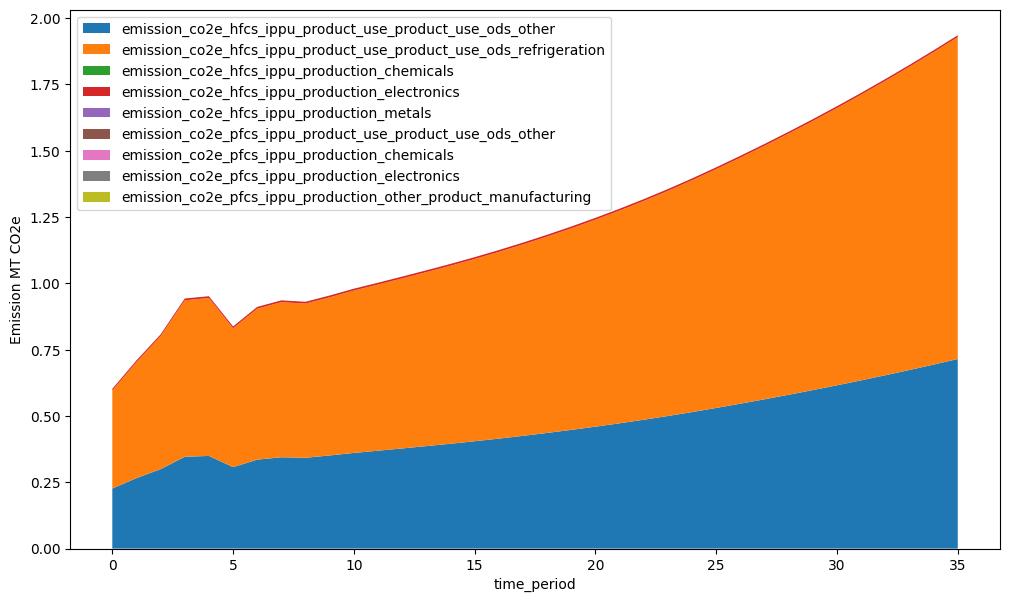

In [97]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.set_xlabel(sisepuede.key_time_period)
ax.set_ylabel("Emission MT CO2e")


fields = [
    x for x in df_cur.columns 
    if x.startswith("emission_co2e_") and ("_ippu_" in x) and (("hfcs" in x) or ("pfcs" in x))
]


sup.plot_stack(
    df_cur,
    fields,
    figtuple = (fig, ax, ),
)

ax.legend()

###  4. The land use reallocation factor affects land use, imports, and exports

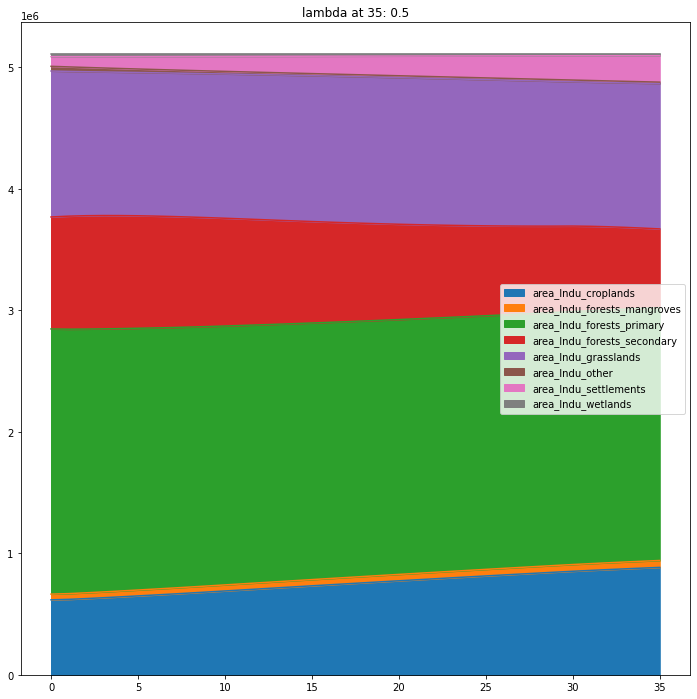

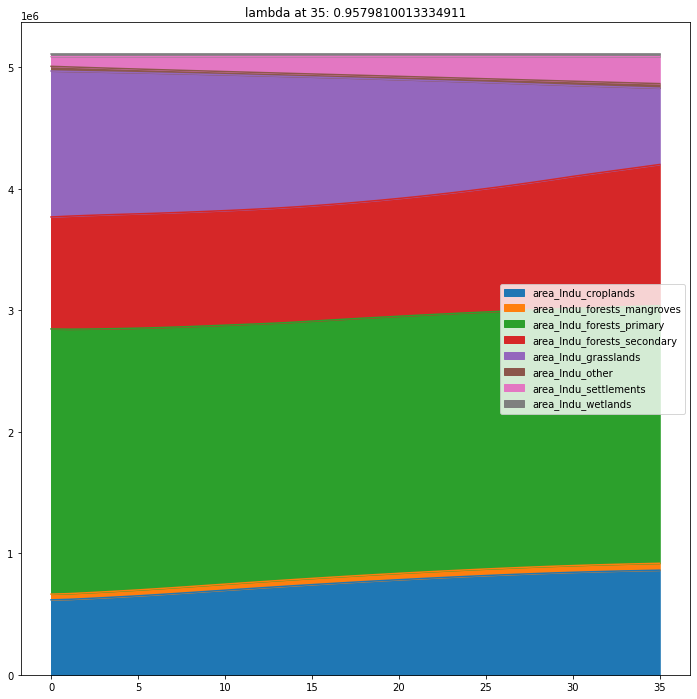

In [18]:
for ind in [0, 4]:
    i = primary_keys_out[ind]
    fig, ax = plt.subplots(figsize = (12, 12))
    
    df_cur = df_out[df_out["primary_id"] == i]
    df_cur = sisepuede.model_attributes.extract_model_variable(df_cur, "Land Use Area", return_type = "data_frame")
    
    val = sisepuede.generate_scenario_database_from_primary_key(i)["DEMO"]["lndu_reallocation_factor"].iloc[-1]
    
    df_cur.plot.area(ax = ax)
    ax.set_title(f"lambda at 35: {val}")
    
    plt.show()
    
    

###  5. Database functionality streamlines parallelization and analysis

##  Suppose you want to generate a certain future using a primary id


In [37]:
p_id = sisepuede.odpt_primary.get_key_value(
    **{
        "design_id": 0,
        "future_id": 145,
        "strategy_id": 6002
    }
)

print(f"{sisepuede.key_primary} = {p_id}")

primary_id = 70215


# You can generate tables on the fly using primary ids
- e.g., say you want to see what the input associated with future_id 145, strategy 6002, design 0 looks like
- You could also feed `generate_scenario_database_from_primary_key` a dictionary of dimensional values

In [40]:

# create a dictionary of runs since different regions will have different dbs
dict_db = sisepuede.generate_scenario_database_from_primary_key(p_id);
df_pid = dict_db.get("peru")

# look at the dataframe
df_pid.head()

,primary_id,region,time_period,area_gnrl_country_ha,area_lndu_infimum_croplands_ha,area_lndu_infimum_flooded_ha,area_lndu_infimum_forests_mangroves_ha,area_lndu_infimum_forests_primary_ha,area_lndu_infimum_forests_secondary_ha,area_lndu_infimum_grasslands_ha,...,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha,yf_lndu_supremum_pastures_tonne_per_ha
0,70215,peru,0,128522000.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,4.06520,3.045533,2.906550,15.8623,1.69064,7.8884,120.7446,11.91872,17.830138,92.81
1,70215,peru,1,128522000.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,4.11630,2.990550,3.099625,14.4220,1.62074,7.5453,112.1206,11.76626,17.452367,92.81
2,70215,peru,2,128522000.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,4.13385,3.011300,3.431075,14.4531,1.69168,7.3091,121.2463,12.02988,17.691529,92.81
3,70215,peru,3,128522000.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,4.13340,2.991850,3.275325,13.9065,1.73058,8.1242,121.8343,12.10522,18.420638,92.81
4,70215,peru,4,128522000.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,4.16745,3.206333,3.310900,12.4729,1.67081,7.7002,126.0845,12.41426,18.582676,92.81
